## Databricks Env

In [1]:
!pip install -r /Workspace/Users/daniel.tomes@databricks.com/client_demos/ci_cd/dbx_demo_cicd/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/Workspace/Users/daniel.tomes@databricks.com/client_demos/ci_cd/dbx_demo_cicd/requirements.txt'


In [0]:
dbutils.library.restartPython()

## Begin

In [13]:
import sys, os
from pyspark.sql.functions import col, lit
import pyspark.sql.functions as F
sys.path.append(os.path.abspath(".."))
import plotly.express as px
import matplotlib.pyplot as plt
from spark_env import spark
import seaborn as sns
import numpy as np

In [ ]:
my_df = spark.table("main.tomes_gen.tmdb_movies_bronze")

In [15]:
my_df.summary().toPandas()

,summary,id,title,genres,original_language,overview,popularity,production_companies,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,count,693556,693550,489992,693556,575207,693556,321483,693556,693556,659543,693556,101420,693556,693556,475225,196795,512934,211083,32225
1,mean,529980.4704018133,NaN,None,None,2.00400608812E10,1.7768854786081365,Infinity,380825.0538038745,931792.5635867903,204.69530720514052,None,494.44776119402985,2.4171487349257443,25.696846397406986,None,400.0,None,None,304677.1666323378
2,stddev,252117.08671066348,NaN,None,None,4.481093616417547E10,21.265739287442464,NaN,8189081.959427781,1.97210164055311E7,87673.77364803736,None,818.4995933725149,3.1784557858583184,365.7599140362933,None,888.8371616893614,None,None,289312.9894822164
3,min,2,"""...""",Action,ab,,0.6,"""Filma"" Shareholders' Association",0.0,-12.0,0.0,Canceled,,0.0,0.0,Alex Chalmers-Casey Rigney-Jason Jones-Jayme ...,101 dalmatians,/1004RY37YoJJ3Zz5Uy7Egjs25BN.jpg,/100IFmS7Pz1vq3BaIB9arYbWma8.jpg,100-10851-107-19259-59-186-7516-8321-187-18501...
4,25%,332291,33.333,None,None,0.0,0.6,1091.0,0.0,0.0,5.0,None,16.0,0.0,0.0,None,2.0,None,None,31506.0
5,50%,536413,706.0,None,None,2003.0,0.6,1091.0,0.0,0.0,47.0,None,81.0,0.0,0.0,None,3.0,None,None,244049.0
6,75%,740340,1995.0,None,None,2003.0,1.24,1440.0,0.0,0.0,90.0,None,222.0,5.5,2.0,None,3.0,None,None,530385.0
7,max,968161,ＮＥＷセクシーメイツ ヌケヌケフィニッシュ大狂乱,Western-War-History-Romance,zu,🎼 The music of his strings warms the hearts wh...,8763.998,한맥문화,5.0E9,2.920357254E9,5.050505E7,Rumored,"～Fated ""raison d'être""～ Europe Tour 2007",10.0,33262.0,﻿﻿Roshanak Morrowatian-Saman Amini-Mohamed Naa...,피너츠 시리즈-찰리 브라운-스누피,/zzzlxEWfxQUySEjPypVn6sGWIdc.jpg,/zzzhUA5k9uX4JxplPWi2qx3XqM2.jpg,999597-999128-999918-1002716-999119-1002084-49...


In [ ]:
pdf = (
    my_df
        # .filter("release_date >= '2020-01-01'")
        # .filter((col("popularity") >= 100) & (col("budget") >= 100000))
        .filter((col("budget") <= 500_000_000) & (col("budget") >= 50_000_000))
        .filter(col("vote_count") >= 1000)
        .filter(col("vote_average") >= 4)
        .select(col("title"), col("popularity"), col("budget"), col("vote_average"))
).toPandas()

In [5]:
pdf

,title,popularity,budget,vote_average
0,Meg 2: The Trench,8763.998,129000000.0,7.079
1,Transformers: Rise of the Beasts,5409.104,200000000.0,7.340
2,Ant-Man and the Wasp: Quantumania,4425.387,200000000.0,6.507
3,Creed III,3994.342,75000000.0,7.262
4,Fast X,3583.861,340000000.0,7.275
...,...,...,...,...
1075,The Lost World: Jurassic Park,2.116,73000000.0,6.524
1076,Jurassic Park III,1.926,93000000.0,6.100
1077,Resident Evil: Afterlife,1.625,60000000.0,6.000
1078,X-Men,1.423,75000000.0,6.992


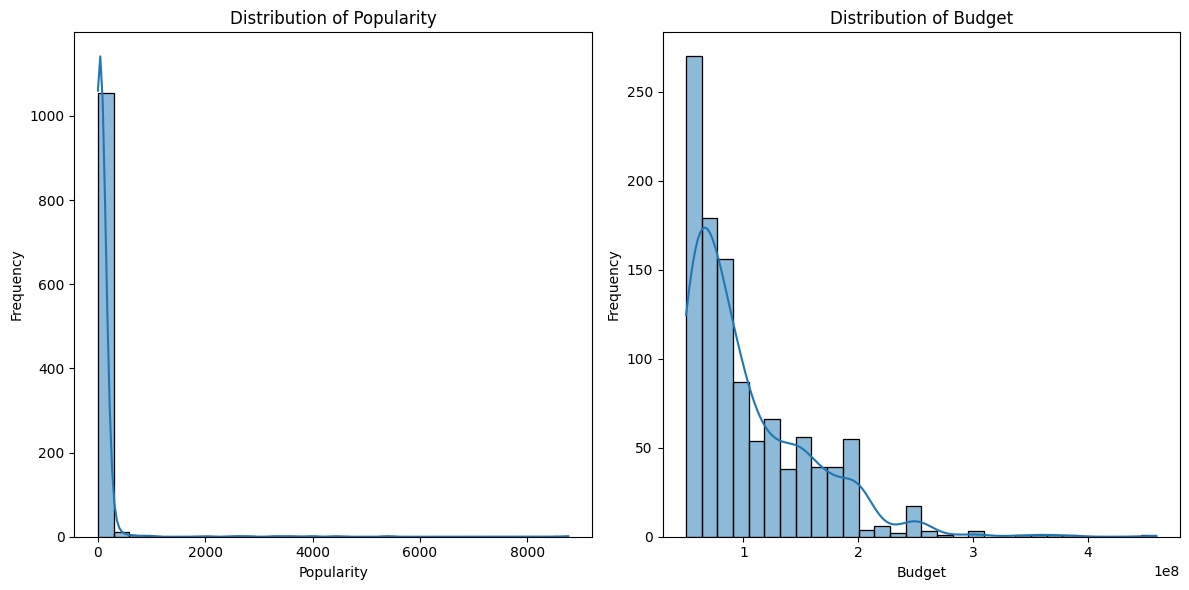

In [8]:
# Plot the distribution of the popularity column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pdf['popularity'], kde=True, bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Plot the distribution of the budget column
plt.subplot(1, 2, 2)
sns.histplot(pdf['budget'], kde=True, bins=30)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Create a scatter plot to visualize the correlation between popularity and budget with tooltips
fig = px.scatter(pdf, x='popularity', y='budget', hover_data=['title'], title='Correlation between Popularity and Budget')
fig.update_layout(xaxis_title='Popularity', yaxis_title='Budget')
fig.show()


In [10]:
# Create a scatter plot to visualize the correlation between vote average and popularity with tooltips
fig = px.scatter(pdf, x='vote_average', y='popularity', hover_data=['title'], title='Correlation between Vote Average and Popularity')
fig.update_layout(xaxis_title='Vote Average', yaxis_title='Popularity')
fig.show()

In [11]:
# Create a scatter plot to visualize the correlation between vote average and budget with tooltips and a red trendline
fig = px.scatter(pdf, x='vote_average', y='budget', hover_data=['title'], title='Correlation between Vote Average and Budget', trendline='ols', trendline_color_override='red')
fig.update_layout(xaxis_title='Vote Average', yaxis_title='Budget')
fig.show()

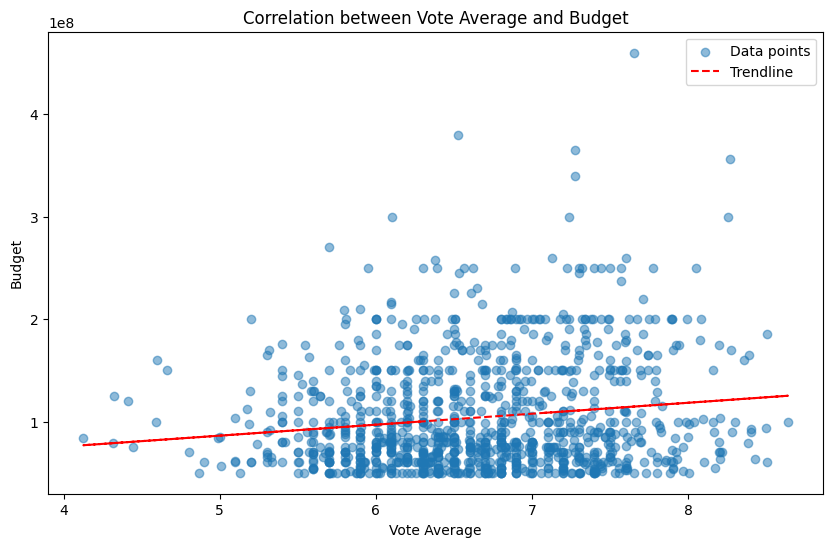

In [14]:
# Create a scatter plot to visualize the correlation between vote average and budget with a red trendline
plt.figure(figsize=(10, 6))
plt.scatter(pdf['vote_average'], pdf['budget'], alpha=0.5, label='Data points')
plt.title('Correlation between Vote Average and Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget')

# Add a trendline
z = np.polyfit(pdf['vote_average'], pdf['budget'], 1)
p = np.poly1d(z)
plt.plot(pdf['vote_average'], p(pdf['vote_average']), "r--", label='Trendline')

plt.legend()
plt.show()